In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data import,cleaning and tyding

In [2]:
df_retail=pd.read_csv('retail_data.csv',header=0,encoding = 'unicode_escape')

In [3]:
df_retail.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
pp.ProfileReport(df_retail)

Number of variables,40
Number of observations,229
Total Missing (%),27.5%
Total size in memory,71.6 KiB
Average record size in memory,320.3 B
Numeric,10
Categorical,26
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [5]:
df_retail.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,229.000000,183.000000,48.000000,48.000000,0.0,229.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,601742.572052,1.842459,1.874375,10.229167,NaN,1045.323144,0.243243,0.648649,0.486486,0.081081,0.027027,0.162162
std,6573.378113,2.595590,2.313372,14.925688,NaN,220.032076,0.434959,0.483978,0.506712,0.276725,0.164399,0.373684
min,600001.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600033.000000,0.550000,0.530000,2.000000,NaN,921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600059.000000,1.070000,1.150000,6.000000,NaN,1030.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600099.000000,2.000000,1.622500,10.500000,NaN,1129.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635810.000000,25.000000,10.950000,73.000000,NaN,3121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
new_columns_names = {
        'Order Val. (Rs. Lac)':'Order_value',
        'Q Val. (Rs. Lac)':'Quote_value',' Order Recd\Lost ':'Order_recd_lost'}
df_retail.rename(columns = new_columns_names, inplace=True)
df_retail.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
def clean(remark):
    remark=str(remark)
    if remark.startswith('Price'):
        return "Price Issue"
    if remark.startswith('Delivery'):
        return "Delivery Issue"
    if remark.startswith('No'):
        return "No Requirement"
    if remark.startswith('Design'):
        return "Design Infeasibility"
    return remark

In [8]:
df_retail['Remarks']=df_retail['Remarks'].apply(clean)
df_retail['Remarks'].value_counts()

Price Issue              110
nan                       58
Budget Constraint         26
Design Infeasibility      25
Delivery Issue             4
No Requirement             4
Service Infeasibility      1
Others                     1
Name: Remarks, dtype: int64

In [9]:
df_retail['Dealer Name'].replace('pearlson','Pearlson',inplace=True)
df_retail['Dealer Name'].value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Pearlson      16
Rajtechnis    15
ITP           14
Name: Dealer Name, dtype: int64

In [10]:
to_drop=['Second Action-Call Status.1','Month','First Action-Call made','Aesthetics','Reduce Street Noise',
        'Low Maintenance','Monsoon Proof','Better Lighting','Reduce AC Energy Cost']

In [11]:
df_retail.drop(to_drop,axis=1,inplace=True)

In [12]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 31 columns):
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
Date DD/MM/YY                                229 non-null object
First Action-Call Status                     229 no

In [17]:
#df['Enquiry Id'].is_unique
#df['Enquiry Id'].value_counts()
df_retail.loc[20,'Enquiry Id']='EC21041648149'
# Enquiry Id 'EC21041648139' repeated twice. Hence replace one with a unique value

In [15]:
df_retail['Order_value'].fillna(0,inplace=True)

In [16]:
df_retail.set_index('Enquiry Id',inplace=True)# As Enquiry Id is a unique value, hence we set it as our index

In [18]:
df_retail['Dealer Name'].value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Pearlson      16
Rajtechnis    15
ITP           14
Name: Dealer Name, dtype: int64

In [19]:
df_retail['Quote QTY']=df_retail['Quote QTY'].str.replace('`','')

In [20]:
df_retail['Quote QTY'].fillna(0,inplace=True)

In [21]:
df_retail['Quote QTY'] = pd.to_numeric(df_retail['Quote QTY'])
df_retail['Quote QTY'].dtype

dtype('float64')

In [22]:
df_retail['Enquiry Date']=pd.to_datetime(df_retail['Enquiry Date'])

In [23]:
df_retail['Date DD/MM/YY']=pd.to_datetime(df_retail['Date DD/MM/YY'])

In [24]:
df_retail['Date of Appointment (DD/MM/YY)']=pd.to_datetime(df_retail['Date of Appointment (DD/MM/YY)'])

In [25]:
df_retail['Date DD/MM/YY.1']=pd.to_datetime(df_retail['Date DD/MM/YY.1'])

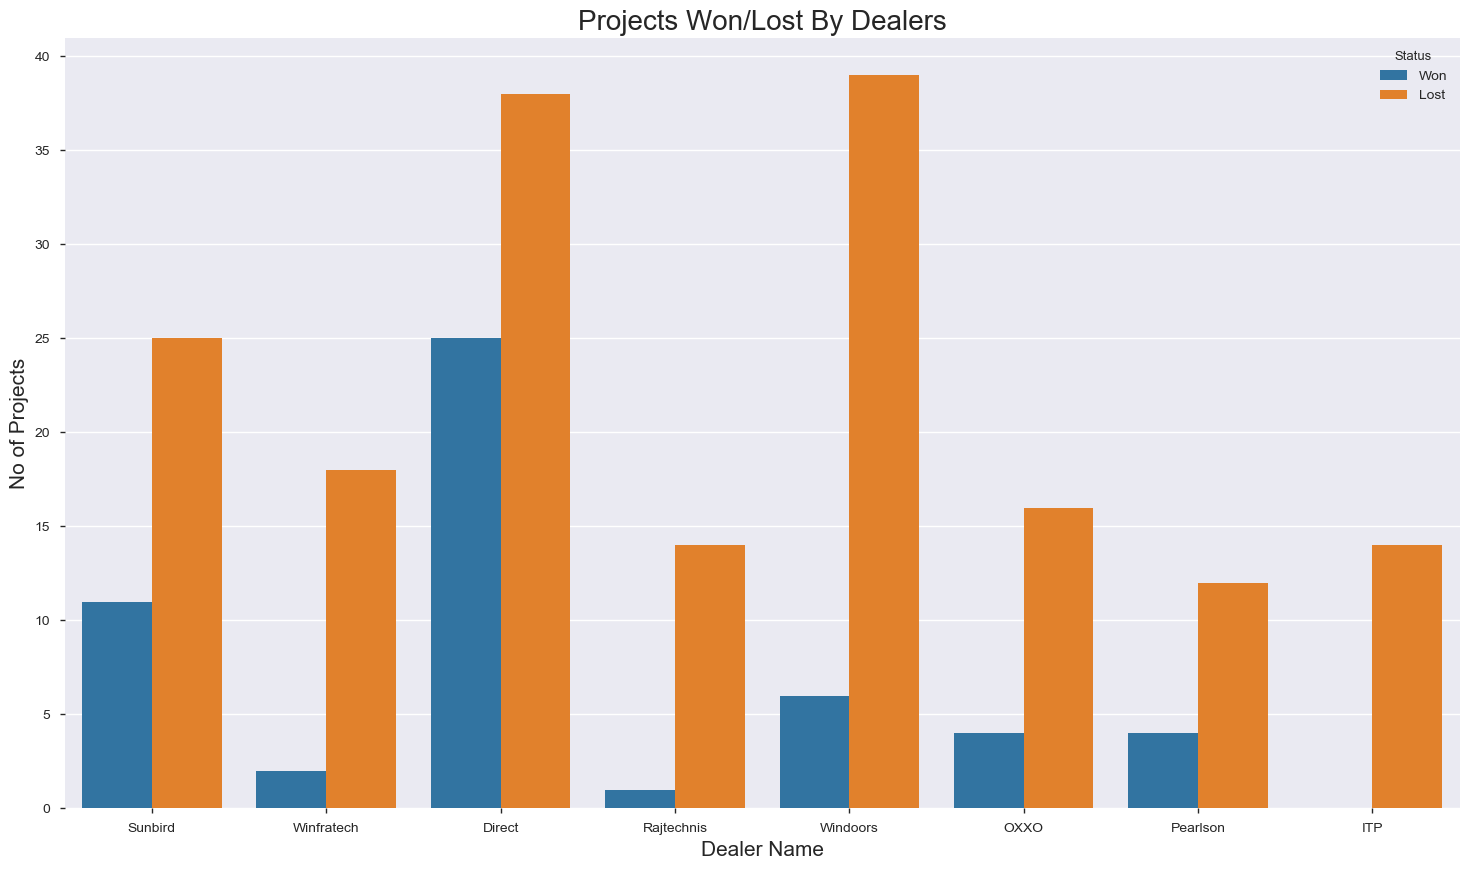

In [26]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Dealer Name',hue='Status',data=df_retail)
plt.xlabel('Dealer Name',fontsize=15)
plt.ylabel('No of Projects',fontsize=15)
plt.title('Projects Won/Lost By Dealers',fontsize=20)
plt.show()

In [27]:
won = df_retail['Status'][df_retail['Status']=='Won'].count()
lost = df_retail['Status'][df_retail['Status']=='Lost'].count()
percent_won=won/df_retail['Status'].count()*100

percent_lost=lost/df_retail['Status'].count()*100
grouped = df_retail.groupby('Dealer Name')

for name,group in grouped:
    if (group['Status'][group['Status']=='Won'].count()/group['Status'].count()*100) > percent_won:
        print("Dealer",name,round(group['Status'][group['Status']=='Won'].count()/group['Status'].count()*100,2),"-Good Performer")
    else:
        print("Dealer",name,"-Bad Performer")
#Overall projects won percent is fixed as the threshold value for selecting dealers performance

Dealer Direct 39.68 -Good Performer
Dealer ITP -Bad Performer
Dealer OXXO -Bad Performer
Dealer Pearlson 25.0 -Good Performer
Dealer Rajtechnis -Bad Performer
Dealer Sunbird 30.56 -Good Performer
Dealer Windoors -Bad Performer
Dealer Winfratech -Bad Performer


In [ ]:
df_retail.to_csv('Clean_retail_data.csv',index=False)

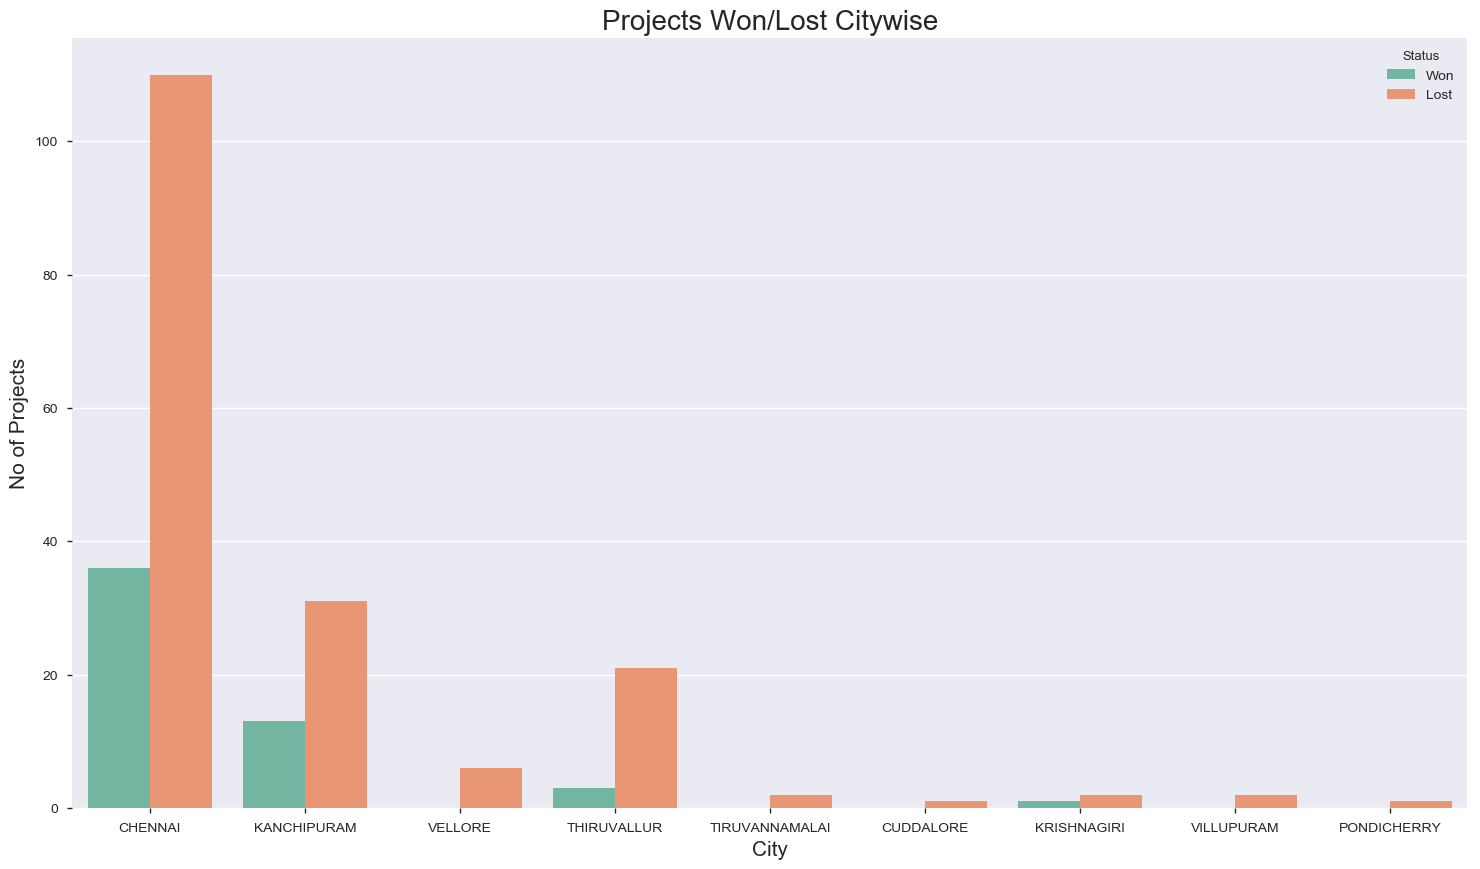

In [28]:
plt.figure(figsize=(18, 10))
sns.countplot(x='City',hue='Status',data=df_retail,palette="Set2")
plt.xlabel('City',fontsize=15)
plt.ylabel('No of Projects',fontsize=15)
plt.title('Projects Won/Lost Citywise',fontsize=20)
plt.show()

In [29]:
df_retail['Remarks'].replace('nan','Others',inplace=True)
df_retail['Remarks'].value_counts()

Price Issue              110
Others                    59
Budget Constraint         26
Design Infeasibility      25
Delivery Issue             4
No Requirement             4
Service Infeasibility      1
Name: Remarks, dtype: int64

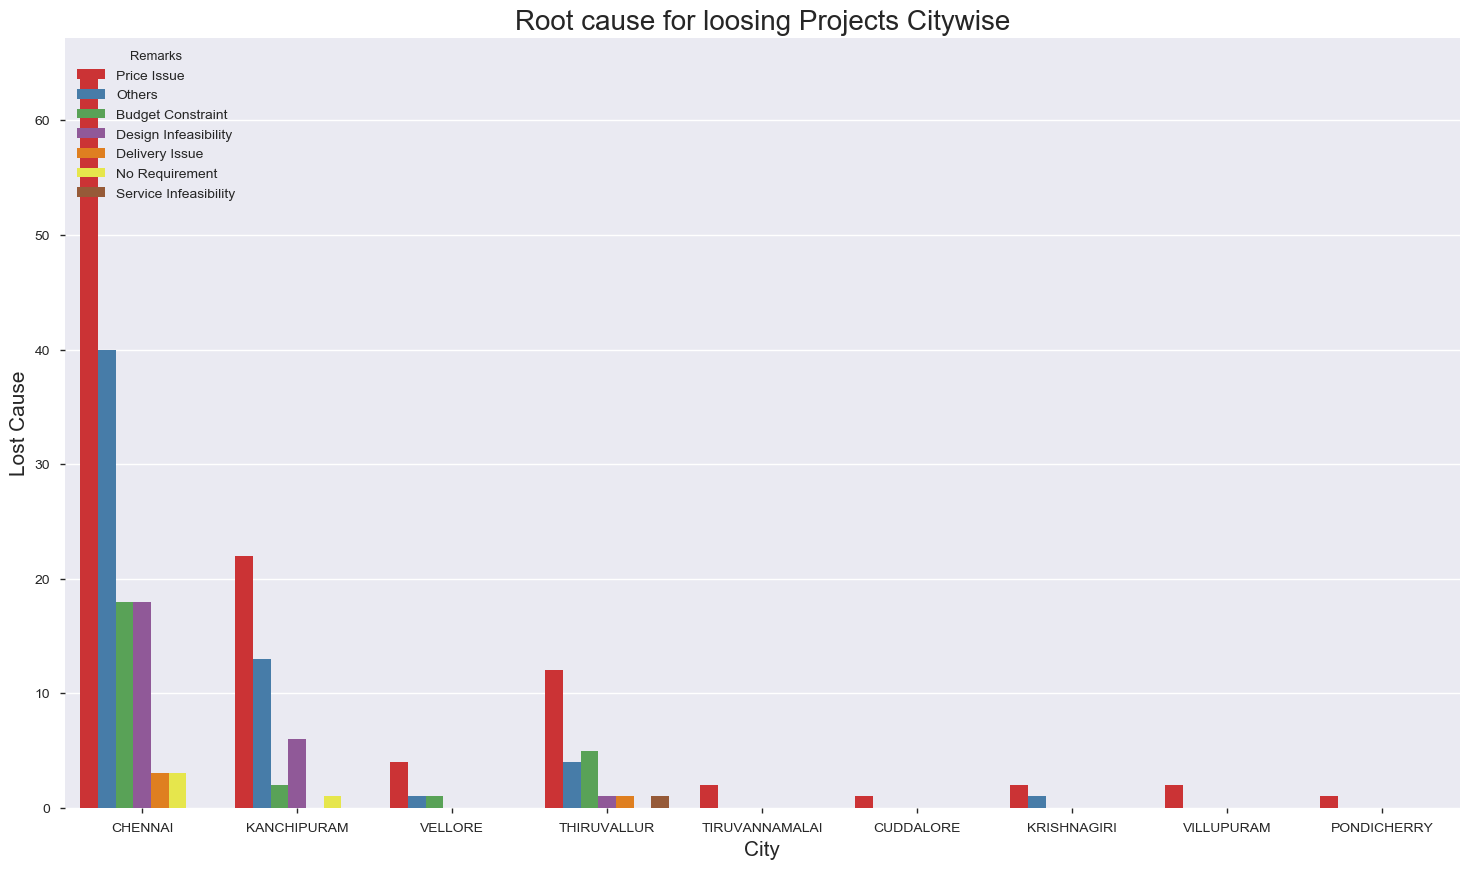

In [30]:
a=['Price Issue','Others','Budget Constraint','Design Infeasibility','Delivery Issue',
   'No Requirement','Service Infeasibility']
plt.figure(figsize=(18, 10))
sns.countplot(x='City',hue='Remarks',data=df_retail,palette="Set1",hue_order=a)
plt.xlabel('City',fontsize=15)
plt.ylabel('Lost Cause',fontsize=15)
plt.title('Root cause for loosing Projects Citywise',fontsize=20)
plt.show()

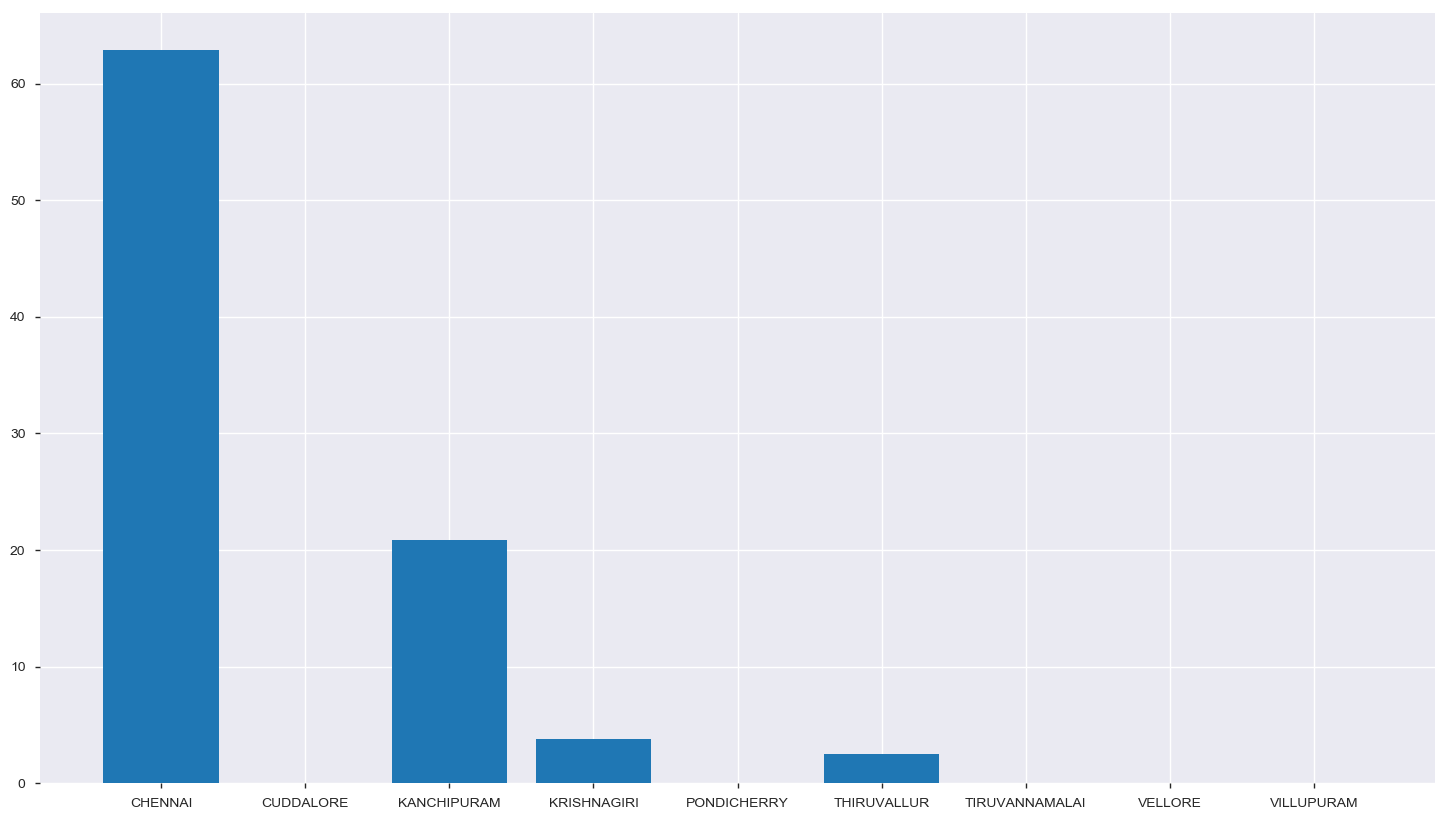

In [31]:
city_sales=df_retail.groupby('City').sum()
plt.figure(figsize=(18, 10))
plt.bar(city_sales.index,city_sales['Order_value'])

plt.show()
# Order value in Chennai is very high as compared to other cities,
# but it can't be treated as outlier as it's in line with order quantity.

In [ ]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df[(df[col_name] > fence_low) | (df[col_name] < fence_high)]
    return df_out

In [ ]:
remove_outlier(df_retail,'Order_value')

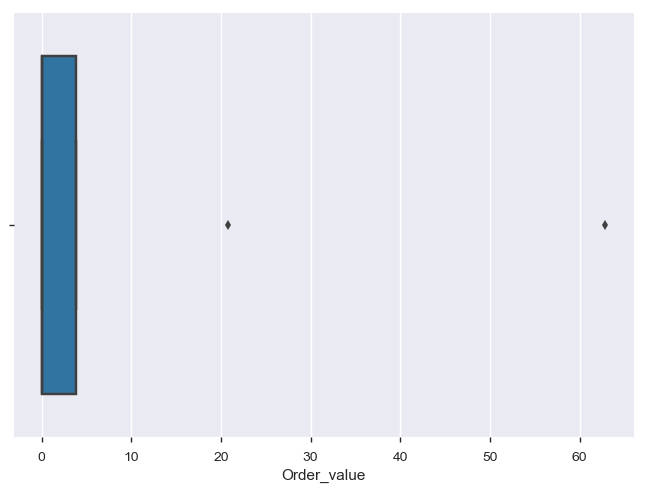

In [32]:
sns.boxplot(x=city_sales['Order_value'])
plt.show()

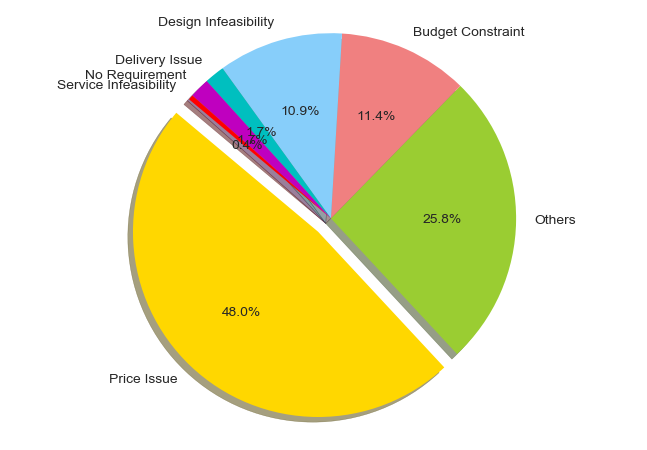

In [33]:
labels = ['Price Issue','Others','Budget Constraint','Design Infeasibility',
          'Delivery Issue','No Requirement','Service Infeasibility']
sizes = df_retail['Remarks'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','c','m','r']
explode = (0.1, 0, 0, 0,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [34]:
pd.crosstab(df_retail.City,df_retail.Remarks,margins = True, margins_name = 'Grand Total')

Remarks,Budget Constraint,Delivery Issue,Design Infeasibility,No Requirement,Others,Price Issue,Service Infeasibility,Grand Total
City,,,,,,,,
CHENNAI,18,3,18,3,40,64,0,146
CUDDALORE,0,0,0,0,0,1,0,1
KANCHIPURAM,2,0,6,1,13,22,0,44
KRISHNAGIRI,0,0,0,0,1,2,0,3
PONDICHERRY,0,0,0,0,0,1,0,1
THIRUVALLUR,5,1,1,0,4,12,1,24
TIRUVANNAMALAI,0,0,0,0,0,2,0,2
VELLORE,1,0,0,0,1,4,0,6
VILLUPURAM,0,0,0,0,0,2,0,2


In [35]:
pd.crosstab([df_retail['Dealer Name'],df_retail.City],df_retail.Status,margins = True, margins_name = 'Grand Total')

Status                      Lost  Won  Grand Total
Dealer Name City                                  
Direct      CHENNAI           19   13           32
            KANCHIPURAM       15   10           25
            KRISHNAGIRI        0    1            1
            PONDICHERRY        1    0            1
            THIRUVALLUR        3    1            4
ITP         CHENNAI            7    0            7
            KANCHIPURAM        2    0            2
            THIRUVALLUR        4    0            4
            VILLUPURAM         1    0            1
OXXO        CHENNAI            9    2           11
            KANCHIPURAM        2    1            3
            THIRUVALLUR        5    1            6
Pearlson    CHENNAI           12    4           16
Rajtechnis  CHENNAI           13    1           14
            THIRUVALLUR        1    0            1
Sunbird     CHENNAI           18    9           27
            KANCHIPURAM        5    1            6
            THIRUVALLUR        0    1            1
            TIRUVANNAMALAI     2    0            2
Windoors    CHENNAI           19    5           24
            CUDDALORE          1    0            1
            KANCHIPURAM        2    1            3
            KRISHNAGIRI        2    0            2
            THIRUVALLUR        8    0            8
            VELLORE            6    0            6
            VILLUPURAM         1    0            1
Winfratech  CHENNAI           13    2           15
            KANCHIPURAM        5    0            5
Grand Total                  176   53          229

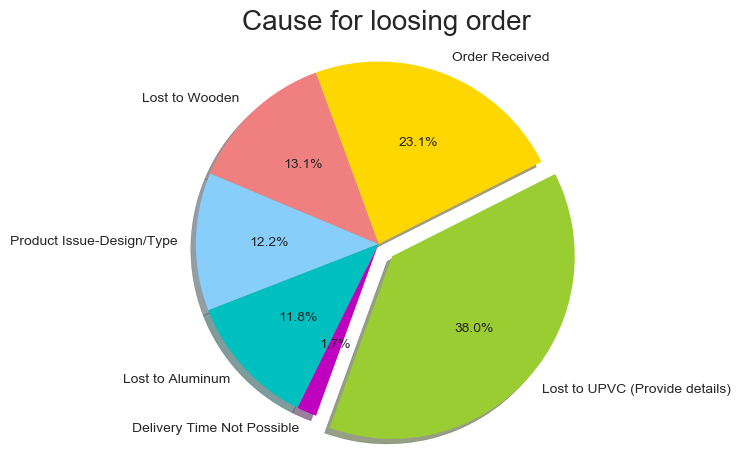

In [36]:
label = ['Lost to UPVC (Provide details)','Order Received','Lost to Wooden','Product Issue-Design/Type',
          'Lost to Aluminum','Delivery Time Not Possible']
size = df_retail['Order_recd_lost'].value_counts()
color = ['yellowgreen','gold','lightcoral', 'lightskyblue','c','m']
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice

# Plot
plt.pie(size, explode=explode, labels=label, colors=color,
autopct='%1.1f%%', shadow=True, startangle=250)
plt.title('Cause for loosing order',fontsize=20)
plt.axis('equal')
plt.show()

In [37]:
df_retail[' Remarks-Brand and value if lost to UPVC '].value_counts()

lost                                       49
follow up                                  15
budget constraint                           8
order received                              6
LOST                                        4
Follow up                                   4
lost                                        2
Budget constraint                           2
won                                         2
Order received                              2
design not feasible                         2
komralin                                    1
Fortune                                     1
measurement taken                           1
follow up, prakash                          1
order recived                               1
lost to encraft                             1
wintech                                     1
lost due to sill width                      1
order closed                                1
order lost                                  1
alphine                           

In [43]:
def percConvert(ser):
    return round(ser/float(ser[-1]),2)*100
pd.crosstab(df_retail['City'],df_retail.Source,margins = True).apply(percConvert,axis=1)

Source,Current User,Friends or Family,Internet,Just dial,All
City,,,,,
CHENNAI,1.0,45.0,51.0,3.0,100.0
CUDDALORE,0.0,0.0,100.0,0.0,100.0
KANCHIPURAM,0.0,41.0,59.0,0.0,100.0
KRISHNAGIRI,0.0,0.0,100.0,0.0,100.0
PONDICHERRY,0.0,100.0,0.0,0.0,100.0
THIRUVALLUR,0.0,42.0,58.0,0.0,100.0
TIRUVANNAMALAI,0.0,0.0,100.0,0.0,100.0
VELLORE,0.0,50.0,33.0,17.0,100.0
VILLUPURAM,0.0,50.0,50.0,0.0,100.0


In [47]:
pd.crosstab([df_retail['Dealer Name'],df_retail['Status']],df_retail['Order_recd_lost'],
            margins = True,margins_name='Total')

Order_recd_lost     Delivery Time Not Possible  Lost to Aluminum  \
Dealer Name Status                                                 
Direct      Lost                             1                 5   
            Won                              0                 0   
ITP         Lost                             0                 0   
OXXO        Lost                             0                 2   
            Won                              0                 0   
Pearlson    Lost                             1                 3   
            Won                              0                 0   
Rajtechnis  Lost                             0                 4   
            Won                              0                 0   
Sunbird     Lost                             2                 2   
            Won                              0                 0   
Windoors    Lost                             0                 7   
            Won                              0                 0   
Winfratech  Lost                             0                 4   
            Won                              0                 0   
Total                                        4                27   

Order_recd_lost     Lost to UPVC (Provide details)  Lost to Wooden  \
Dealer Name Status                                                   
Direct      Lost                                23               5   
            Won                                  0               0   
ITP         Lost                                10               1   
OXXO        Lost                                 6               3   
            Won                                  0               0   
Pearlson    Lost                                 4               2   
            Won                                  0               0   
Rajtechnis  Lost                                10               0   
            Won                                  0               0   
Sunbird     Lost                                 7               7   
            Won                                  0               0   
Windoors    Lost                                21               9   
            Won                                  0               0   
Winfratech  Lost                                 6               3   
            Won                                  0               0   
Total                                           87              30   

Order_recd_lost     Order Received  Product Issue-Design/Type  Total  
Dealer Name Status                                                    
Direct      Lost                 0                          4     38  
            Won                 25                          0     25  
ITP         Lost                 0                          3     14  
OXXO        Lost                 0                          5     16  
            Won                  4                          0      4  
Pearlson    Lost                 0                          2     12  
            Won                  4                          0      4  
Rajtechnis  Lost                 0                          0     14  
            Won                  1                          0      1  
Sunbird     Lost                 0                          7     25  
            Won                 11                          0     11  
Windoors    Lost                 0                          2     39  
            Won                  6                          0      6  
Winfratech  Lost                 0                          5     18  
            Won                  2                          0      2  
Total                           53                         28    229